In [1]:
! pip install category_encoders
! pip install pdpbox
! pip install shap

     |████████████████████████████████| 80 kB 5.1 MB/s 
     |████████████████████████████████| 34.0 MB 41 kB/s 
     |████████████████████████████████| 13.1 MB 6.5 kB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758225 sha256=c67b17b0629ed5a79fa813c1ae1309fc2a9fda9f36597d5273a72804bb1081a3
  Stored in directory: /root/.cache/pip/wheels/f4/d0/1a/b80035625c53131f52906a6fc4dd690d8efd2bf8af6a4015eb
Successfully built pdpbox
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


     |████████████████████████████████| 356 kB 30.2 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491661 sha256=9e14cf3c474df7a94a1c69e87fe0a2cd38fead424ae694d07da97065c58aac7b
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (9,473 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 148492 files and d

In [1]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
plt.rc('axes', unicode_minus=False)

In [5]:
import pandas as pd
# 대여소 상세 데이터
df1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/공공자전거 대여소 정보(21.06월 기준).csv", encoding='cp949')

# 2,6월 대여이력 상세 데이터
df2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/공공자전거 대여이력 정보_2021.06.csv", encoding='cp949')
df3 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/공공자전거 대여이력 정보_2021.02.csv", encoding='cp949')

# 2,6월 기온 데이터
df4 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/extremum_20210831202503.csv")
df5 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/extremum_20210831202514.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
# 대여소 상세 데이터 전처리
df1.columns = ["대여소번호", "대여소명", "소재지", "상세주소", "위도", "경도", "설치시기", "LCD 거치대수", "QR 거치대수", "운영방식"]
df1.drop([0,1,2,3], axis=0, inplace=True)
df1.drop(["대여소명", "상세주소", "설치시기", "LCD 거치대수", "QR 거치대수", "운영방식"], axis=1, inplace=True)

In [7]:
df1

대여소번호  소재지           위도           경도
4      102.0  마포구   37.5556488  126.9106293
5      103.0  마포구  37.55495071  126.9108353
6      104.0  마포구  37.55062866  126.9149857
7      105.0  마포구  37.55000687  126.9148254
8      106.0  마포구  37.54864502  126.9128265
...      ...  ...          ...          ...
2466  4864.0  송파구  37.50205612  127.1105499
2467  4865.0  송파구  37.51634216   127.115593
2468  4867.0  송파구   37.5000267  127.1184311
2469  4868.0  송파구  37.50717163  127.1012421
2470  4869.0  송파구  37.51629639    127.08461

[2467 rows x 4 columns]

In [8]:
# 대여이력 정보 6월
df2.drop(["자전거번호","대여 대여소명","대여거치대","반납대여소명","반납거치대"], axis=1, inplace=True)

# 결측치 확인 및 제거
print(df2.isna().sum())
df2.dropna(axis=0, inplace=True)

# 데이터 전처리
df2 = df2[df2["대여일시"] >= '2021-06-01']

df2.reset_index(inplace=True)
df2.drop("index", axis=1, inplace=True)

# 대여일시, 대여시간 데이터로 분할
df2_temp = df2.대여일시.str.split(" ").str[1]
df2["대여시간"] = df2_temp.str.split(":").str[0]
df2["대여일시"] = df2["대여일시"].str.split(" ").str[0]

# 이미 사용한 변수 삭제
del df2_temp

# 대여이력 정보에 대여소 정보를 병합
df2 = df2.merge(df1, how="left", left_on="대여 대여소번호", right_on="대여소번호")

# 병합 후 결측치 확인 및 제거, 전처리
print(df2.isna().sum())
df2.dropna(axis=0, inplace=True)
df2 = df2.drop(["반납일시", "반납대여소번호", "이용시간", "이용거리", "대여소번호", "위도", "경도"], axis=1)

대여일시         0
대여 대여소번호     0
반납일시         0
반납대여소번호      0
이용시간         0
이용거리        73
dtype: int64
대여일시           0
대여 대여소번호       0
반납일시           0
반납대여소번호        0
이용시간           0
이용거리           0
대여시간           0
대여소번호       2017
소재지         2017
위도          2017
경도          2017
dtype: int64


In [9]:
# 대여일시, 시각, 소재지에 따른 대여건수 데이터 생성
df21 = pd.DataFrame(df2.groupby(["대여일시","대여시간", "소재지"]).count()["대여 대여소번호"])
df21.columns = ["대여건수"]

In [10]:
df21

대여건수
대여일시       대여시간 소재지       
2021-06-01 00   강남구     48
                강동구     74
                강북구     63
                강서구    147
                관악구    104
...                    ...
2021-06-30 23   영등포구     2
                용산구      1
                은평구      1
                종로구      4
                중구       1

[17973 rows x 1 columns]

In [11]:
# # 6월에 대한 대여일시, 대여시간, 소재지, 대여건수 데이터 생성
# df_data1 = df2.merge(df21, how="left", left_on=["대여일시","대여시간", "소재지"], right_on=["대여일시","대여시간", "소재지"])
# del df2, df21
# df_data1.drop("대여 대여소번호", axis=1, inplace=True)

In [12]:
# 대여이력 정보 2월
df3.drop(["자전거번호","대여 대여소명","대여거치대","반납대여소명","반납거치대"], axis=1, inplace=True)

# 결측치 확인 및 제거
print(df3.isna().sum())
df3.dropna(axis=0, inplace=True)

# 데이터 전처리
df3 = df3[df3["대여일시"] >= '2021-02-01']

df3.reset_index(inplace=True)
df3.drop("index", axis=1, inplace=True)

# 대여일시, 대여시간 데이터로 분할
df3_temp = df3.대여일시.str.split(" ").str[1]
df3["대여시간"] = df3_temp.str.split(":").str[0]
df3["대여일시"] = df3["대여일시"].str.split(" ").str[0]

# 이미 사용한 변수 삭제
del df3_temp

# 대여이력 정보에 대여소 정보를 병합
df3 = df3.merge(df1, how="left", left_on="대여 대여소번호", right_on="대여소번호")

# 병합 후 결측치 확인 및 제거, 전처리
print(df3.isna().sum())
df3.dropna(axis=0, inplace=True)
df3 = df3.drop(["반납일시", "반납대여소번호", "이용시간", "이용거리", "대여소번호", "위도", "경도"], axis=1)

대여일시         0
대여 대여소번호     0
반납일시         0
반납대여소번호      0
이용시간         0
이용거리        19
dtype: int64
대여일시           0
대여 대여소번호       0
반납일시           0
반납대여소번호        0
이용시간           0
이용거리           0
대여시간           0
대여소번호       6479
소재지         6479
위도          6479
경도          6479
dtype: int64


In [13]:
# 대여일시, 시각, 소재지에 따른 대여건수 데이터 생성
df31 = pd.DataFrame(df3.groupby(["대여일시","대여시간", "소재지"]).count()["대여 대여소번호"])
df31.columns = ["대여건수"]

In [14]:
df31

대여건수
대여일시       대여시간 소재지      
2021-02-01 00   강남구    12
                강동구    19
                강북구    29
                강서구    56
                관악구    21
...                   ...
2021-02-28 23   용산구    25
                은평구    21
                종로구    39
                중구     15
                중랑구    37

[16763 rows x 1 columns]

In [15]:
# # 2월에 대한 대여일시, 대여시간, 소재지, 대여건수 데이터 생성
# df_data2 = df3.merge(df31, how="left", left_on=["대여일시","대여시간", "소재지"], right_on=["대여일시","대여시간", "소재지"])
# del df3, df31
# df_data2.drop("대여 대여소번호", axis=1, inplace=True)

In [16]:
# 2,6월 데이터 병합
df_data = pd.concat([df31, df21])
df_data.reset_index(inplace=True)

In [17]:
df_data

대여일시 대여시간   소재지  대여건수
0      2021-02-01   00   강남구    12
1      2021-02-01   00   강동구    19
2      2021-02-01   00   강북구    29
3      2021-02-01   00   강서구    56
4      2021-02-01   00   관악구    21
...           ...  ...   ...   ...
34731  2021-06-30   23  영등포구     2
34732  2021-06-30   23   용산구     1
34733  2021-06-30   23   은평구     1
34734  2021-06-30   23   종로구     4
34735  2021-06-30   23    중구     1

[34736 rows x 4 columns]

In [18]:
# 2,6월 기온 데이터
df6 = pd.concat([df5, df4])

In [19]:
# 2,6월 따릉이 데이터와 기온 데이터 병합
df_data = df_data.merge(df6, how="outer", left_on="대여일시", right_on="date")
df_data.drop("date", axis=1, inplace=True)

In [20]:
# 최종 데이터
df_data

대여일시 대여시간   소재지  대여건수  temperature
0      2021-02-01   00   강남구    12          5.0
1      2021-02-01   00   강동구    19          5.0
2      2021-02-01   00   강북구    29          5.0
3      2021-02-01   00   강서구    56          5.0
4      2021-02-01   00   관악구    21          5.0
...           ...  ...   ...   ...          ...
34731  2021-06-30   23  영등포구     2         24.3
34732  2021-06-30   23   용산구     1         24.3
34733  2021-06-30   23   은평구     1         24.3
34734  2021-06-30   23   종로구     4         24.3
34735  2021-06-30   23    중구     1         24.3

[34736 rows x 5 columns]

In [21]:
# 시간별로 훈련 데이터, 검증 데이터, 테스트 데이터 분할
from sklearn.model_selection import train_test_split
from category_encoders import OrdinalEncoder

target = "대여건수"
features = df_data.columns.drop(target)

# 시계열 데이터이므로 분할 후 인코딩이 아니라, 인코딩 후 분할을 거침
enc = OrdinalEncoder()
df_data = enc.fit_transform(df_data)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [22]:
# 어떻게 인코딩 되었는지 확인
enc.mapping

[{'col': '대여일시', 'data_type': dtype('O'), 'mapping': 2021-02-01     1
  2021-02-02     2
  2021-02-03     3
  2021-02-04     4
  2021-02-05     5
  2021-02-06     6
  2021-02-07     7
  2021-02-08     8
  2021-02-09     9
  2021-02-10    10
  2021-02-11    11
  2021-02-12    12
  2021-02-13    13
  2021-02-14    14
  2021-02-15    15
  2021-02-16    16
  2021-02-17    17
  2021-02-18    18
  2021-02-19    19
  2021-02-20    20
  2021-02-21    21
  2021-02-22    22
  2021-02-23    23
  2021-02-24    24
  2021-02-25    25
  2021-02-26    26
  2021-02-27    27
  2021-02-28    28
  2021-06-01    29
  2021-06-02    30
  2021-06-03    31
  2021-06-04    32
  2021-06-05    33
  2021-06-06    34
  2021-06-07    35
  2021-06-08    36
  2021-06-09    37
  2021-06-10    38
  2021-06-11    39
  2021-06-12    40
  2021-06-13    41
  2021-06-14    42
  2021-06-15    43
  2021-06-16    44
  2021-06-17    45
  2021-06-18    46
  2021-06-19    47
  2021-06-20    48
  2021-06-21    49
  2021-06-22    50

In [23]:
train = df_data[(df_data["대여일시"] < 20) | ((df_data["대여일시"] >= 29) & (df_data["대여일시"] < 48))]
val = df_data[((df_data["대여일시"] >= 20) & (df_data["대여일시"] < 24)) | ((df_data["대여일시"] >= 48) & (df_data["대여일시"] < 52))]
test = df_data[((df_data["대여일시"] >= 24) & (df_data["대여일시"] < 29)) | (df_data["대여일시"] >= 52)]

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val =val[target]
X_test = test[features]
y_test = test[target]

### 1-1. 랜덤포레스트 모델 (with RandomizedSearchCV)

In [24]:
# RandomizedSearchCV로 랜덤포레스트 모델을 확인

from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform


model = RandomForestRegressor(random_state=2)

dists = {
    'min_samples_leaf': randint(3,30),
    'max_depth': randint(10,50),
    'n_estimators': randint(300, 1000),
    'max_features': uniform(0,1)
}

clf = RandomizedSearchCV(
    model,
    param_distributions = dists,
    n_iter = 30,
    cv=3,
    scoring='r2',
    verbose=1
)

clf.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:  9.3min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [25]:
# 최적의 하이퍼 파라미터 추출 및 r2 score 확인

print("최적의 하이퍼 파라미터:", clf.best_params_)
print("r2: ", clf.best_score_)
model1_best = clf.best_estimator_

최적의 하이퍼 파라미터: {'max_depth': 31, 'max_features': 0.8044275275100635, 'min_samples_leaf': 5, 'n_estimators': 641}
r2:  0.6496991856315583


In [26]:
# r2 score에 따라 분류된 하이퍼 파라미터 세트 확인
pd.DataFrame(clf.cv_results_).sort_values(by='rank_test_score').T

14  ...                                                 22
mean_fit_time                                                     9.31482  ...                                            5.78615
std_fit_time                                                     0.119185  ...                                          0.0425832
mean_score_time                                                  0.319014  ...                                           0.326479
std_score_time                                                  0.0418674  ...                                          0.0380607
param_max_depth                                                        31  ...                                                 40
param_max_features                                               0.804428  ...                                           0.278897
param_min_samples_leaf                                                  5  ...                                                  8
param_n_estimators                                                    641  ...                                                907
params                  {'max_depth': 31, 'max_features': 0.8044275275...  ...  {'max_depth': 40, 'max_features': 0.2788974813...
split0_test_score                                                0.715998  ...                                           0.213749
split1_test_score                                                 0.57633  ...                                           0.537147
split2_test_score                                                 0.65677  ...                                           0.501542
mean_test_score                                                  0.649699  ...                                           0.417479
std_test_score                                                  0.0572379  ...                                            0.14479
rank_test_score                                                         1  ...                                                 30

[15 rows x 30 columns]

In [27]:
# 검증데이터에서 r2, mse score 확인
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

y_pred_val = model1_best.predict(X_val)

print("r2 score for val:", r2_score(y_val, y_pred_val))
print("mse score for val:", mean_squared_error(y_val, y_pred_val))

r2 score for val: 0.8064420885386441
mse score for val: 5666.451954541158


In [28]:
# 테스트 데이터에서 r2,mse score 확인
y_pred_test = model1_best.predict(X_test)

print("r2 score for test:", r2_score(y_test, y_pred_test))
print("mse for test:", mean_squared_error(y_test, y_pred_test))

r2 score for test: 0.777044523962266
mse for test: 6400.766386715489


### 1-2. 랜덤포레스트 모델

In [29]:
# 적절한 하이퍼 파라미터를 사용하여서 랜덤포레스트 모델을 돌림

from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

model2 = RandomForestRegressor(random_state=2,
                               n_estimators=1000,
                               max_depth=16,
                               max_features=0.5,  
                               min_samples_leaf=3)

model2.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=16, max_features=0.5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=2, verbose=0, warm_start=False)

In [30]:
# 검증데이터에서 r2, mse score 확인
y_pred_val2 = model2.predict(X_val)

print("r2 score for val:", r2_score(y_val, y_pred_val2))
print("mse score for val:", mean_squared_error(y_val, y_pred_val2))

r2 score for val: 0.7732532088886481
mse score for val: 6638.063967410483


In [31]:
# 테스트 데이터에서 r2, mse score 확인
y_pred_test2 = model2.predict(X_test)

print("r2 score for test:", r2_score(y_test, y_pred_test2))
print("mse for test:", mean_squared_error(y_test, y_pred_test2))

r2 score for test: 0.7483575140270282
mse for test: 7224.333729361813


### 2-1. xgboost 모델 

In [32]:
# early stopping 기법을 사용해서 xgboost에서 적절한 하이퍼 파라미터(RandomizedSearchCV를 돌려서 나온 하이퍼 파라미터를 사용)를 조정함

from xgboost import XGBRegressor


model3 = XGBRegressor(random_state=2,
                      max_depth=7, #5
                      n_estimators=1000,
                      learing_rate=0.3,  #0.1
                      n_jobs=-1)


eval_set = [(X_train, y_train), (X_val, y_val)]

model3.fit(X_train, y_train, 
           eval_set=eval_set,
           eval_metric='rmse',
           early_stopping_rounds=70
           )

[04:31:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:183.343	validation_1-rmse:213.766
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 70 rounds.
[1]	validation_0-rmse:170.347	validation_1-rmse:200.281
[2]	validation_0-rmse:158.724	validation_1-rmse:188.122
[3]	validation_0-rmse:148.2	validation_1-rmse:177.028
[4]	validation_0-rmse:138.787	validation_1-rmse:167.574
[5]	validation_0-rmse:130.433	validation_1-rmse:159.116
[6]	validation_0-rmse:122.906	validation_1-rmse:151.441
[7]	validation_0-rmse:116.246	validation_1-rmse:144.998
[8]	validation_0-rmse:109.705	validation_1-rmse:138.591
[9]	validation_0-rmse:104.067	validation_1-rmse:133.187
[10]	validation_0-rmse:99.4074	validation_1-rmse:128.674
[11]	validation_0-rmse:95.156	validation_1-rmse:124.601
[12]	validation_0-rmse:91.2818	validation_1

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learing_rate=0.3, learning_rate=0.1,
             max_delta_step=0, max_depth=7, min_child_weight=1, missing=None,
             n_estimators=1000, n_jobs=-1, nthread=None, objective='reg:linear',
             random_state=2, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

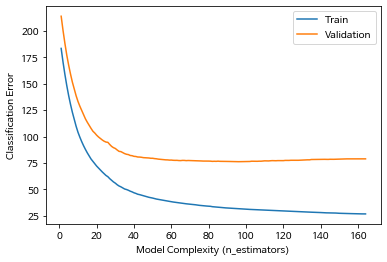

In [33]:
import matplotlib.pyplot as plt

# eval_set에서 eval_metric으로 측정한 데이터를 추출
results = model3.evals_result()
train_error = results['validation_0']['rmse']
val_error = results['validation_1']['rmse']

# 실행횟수에 따른 훈련, 검증 데이터의 rmse 값을 그래프로 그림 
epoch = range(1, len(train_error)+1)
plt.plot(epoch, train_error, label='Train')
plt.plot(epoch, val_error, label='Validation')
plt.ylabel('Classification Error')
plt.xlabel('Model Complexity (n_estimators)')
plt.legend();

In [34]:
# 검증데이터의 r2, mse score 확인
y_pred_val3 = model3.predict(X_val)

print("r2 score for val:", r2_score(y_val, y_pred_val3))
print("mse score for val:", mean_squared_error(y_val, y_pred_val3))

r2 score for val: 0.8019826447090201
mse score for val: 5797.003188607269


In [35]:
# 테스트 데이터의 r2, mse score 확인
y_pred_test3 = model3.predict(X_test)

print("r2 score for test:", r2_score(y_test, y_pred_test3))
print("mse for test:", mean_squared_error(y_test, y_pred_test3))

r2 score for test: 0.6995269826951411
mse for test: 8626.195792358205


### 2-2. xgboost 모델 실험 (with 하이퍼 파라미터 조정)

In [36]:
from xgboost import XGBRegressor



model4 = XGBRegressor(random_state=2,
                      max_depth=7,
                      n_estimators=1000,
                      learning_rate=0.1,
                      n_jobs=-1)


eval_set = [(X_train, y_train), (X_val, y_val)]

model4.fit(X_train, y_train, 
           eval_set=eval_set,
           eval_metric='rmse',
           early_stopping_rounds=70
           )

[04:31:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:183.343	validation_1-rmse:213.766
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 70 rounds.
[1]	validation_0-rmse:170.347	validation_1-rmse:200.281
[2]	validation_0-rmse:158.724	validation_1-rmse:188.122
[3]	validation_0-rmse:148.2	validation_1-rmse:177.028
[4]	validation_0-rmse:138.787	validation_1-rmse:167.574
[5]	validation_0-rmse:130.433	validation_1-rmse:159.116
[6]	validation_0-rmse:122.906	validation_1-rmse:151.441
[7]	validation_0-rmse:116.246	validation_1-rmse:144.998
[8]	validation_0-rmse:109.705	validation_1-rmse:138.591
[9]	validation_0-rmse:104.067	validation_1-rmse:133.187
[10]	validation_0-rmse:99.4074	validation_1-rmse:128.674
[11]	validation_0-rmse:95.156	validation_1-rmse:124.601
[12]	validation_0-rmse:91.2818	validation_1

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=2,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

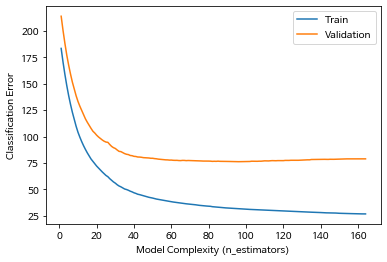

In [37]:
import matplotlib.pyplot as plt

results = model4.evals_result()
train_error = results['validation_0']['rmse']
val_error = results['validation_1']['rmse']

epoch = range(1, len(train_error)+1)
plt.plot(epoch, train_error, label='Train')
plt.plot(epoch, val_error, label='Validation')
plt.ylabel('Classification Error')
plt.xlabel('Model Complexity (n_estimators)') # Zoom in
plt.legend();

In [38]:
y_pred_val4 = model4.predict(X_val)

print("r2 score for val:", r2_score(y_val, y_pred_val4))
print("mse score for val:", mean_squared_error(y_val, y_pred_val4))

r2 score for val: 0.8019826447090201
mse score for val: 5797.003188607269


In [39]:
y_pred_test4 = model4.predict(X_test)

print("r2 score for test:", r2_score(y_test, y_pred_test4))
print("mse for test:", mean_squared_error(y_test, y_pred_test4))

r2 score for test: 0.6995269826951411
mse for test: 8626.195792358205


### 2-3. xgboost 모델 (with RandomizedSearchCV)

In [40]:
# RandomizedSearchCV를 사용해서 xgboost모델의 하이퍼 파라미터를 구해봄

model5= XGBRegressor(random_state=2)


param_distributions = { 
    'n_estimators': randint(100, 1000), 
    'max_depth': randint(4, 30), 
    'learning_rate': uniform(0, 1), 
}

clf = RandomizedSearchCV(
    model5,
    param_distributions=param_distributions,
    n_iter=30,
    cv=3,
    scoring='r2',
    random_state=2,
    n_jobs=-1
)

clf.fit(X_train, y_train)

[04:36:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=2, reg_alpha=...
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa87f5db410>,
                                        'max_depth': <scipy

In [41]:
# 최적의 하이퍼 파라미터 및 r2 score을 구하고 최적의 모델을 생성함
print("best hyper parameter:", clf.best_params_)
print("r2 score:", clf.best_score_)
model5_best = clf.best_estimator_

best hyper parameter: {'learning_rate': 0.8895200639461449, 'max_depth': 22, 'n_estimators': 688}
r2 score: 0.5819936527572018


In [42]:
pd.DataFrame(clf.cv_results_).sort_values(by='rank_test_score').T

20  ...                                                 2 
mean_fit_time                                                  3.93442  ...                                            7.19723
std_fit_time                                                 0.0210084  ...                                          0.0323499
mean_score_time                                              0.0704826  ...                                           0.310955
std_score_time                                              0.00738041  ...                                          0.0172209
param_learning_rate                                            0.88952  ...                                           0.420368
param_max_depth                                                     22  ...                                                  6
param_n_estimators                                                 688  ...                                                533
params               {'learning_rate': 0.8895200639461449, 'max_dep...  ...  {'learning_rate': 0.42036780208748903, 'max_de...
split0_test_score                                             0.602911  ...                                           -2.32397
split1_test_score                                             0.552598  ...                                            0.46635
split2_test_score                                             0.590472  ...                                          0.0540992
mean_test_score                                               0.581994  ...                                          -0.601174
std_test_score                                               0.0213972  ...                                            1.22977
rank_test_score                                                      1  ...                                                 30

[14 rows x 30 columns]

In [43]:
# 최적의 모델으로 검증데이터의 r2, mse score 확인
y_pred_val5 = model5_best.predict(X_val)

print("r2 score for val:", r2_score(y_val, y_pred_val5))
print("mse score for val:", mean_squared_error(y_val, y_pred_val5))

r2 score for val: 0.7086992214315162
mse score for val: 8527.896656956329


In [44]:
# 최적의 모델으로 테스트 데이터의 r2, mse score 확인
y_pred_test5 = model5_best.predict(X_test)

print("r2 score for test:", r2_score(y_test, y_pred_test5))
print("mse for test:", mean_squared_error(y_test, y_pred_test5))

r2 score for test: 0.5247315945092634
mse for test: 13644.34769037975


### PDP ,SHAP 분석

In [45]:
from pdpbox import pdp
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
# 범주형 특성이 변환된 정수값 확인 
enc.mapping

[{'col': '대여일시', 'data_type': dtype('O'), 'mapping': 2021-02-01     1
  2021-02-02     2
  2021-02-03     3
  2021-02-04     4
  2021-02-05     5
  2021-02-06     6
  2021-02-07     7
  2021-02-08     8
  2021-02-09     9
  2021-02-10    10
  2021-02-11    11
  2021-02-12    12
  2021-02-13    13
  2021-02-14    14
  2021-02-15    15
  2021-02-16    16
  2021-02-17    17
  2021-02-18    18
  2021-02-19    19
  2021-02-20    20
  2021-02-21    21
  2021-02-22    22
  2021-02-23    23
  2021-02-24    24
  2021-02-25    25
  2021-02-26    26
  2021-02-27    27
  2021-02-28    28
  2021-06-01    29
  2021-06-02    30
  2021-06-03    31
  2021-06-04    32
  2021-06-05    33
  2021-06-06    34
  2021-06-07    35
  2021-06-08    36
  2021-06-09    37
  2021-06-10    38
  2021-06-11    39
  2021-06-12    40
  2021-06-13    41
  2021-06-14    42
  2021-06-15    43
  2021-06-16    44
  2021-06-17    45
  2021-06-18    46
  2021-06-19    47
  2021-06-20    48
  2021-06-21    49
  2021-06-22    50

In [47]:
# 숫자형으로 변환된 범주형 특성을 원래상태로 돌리기 위한 전처리

features = ["대여시간", "소재지"]

for item in enc.mapping:
  if item["col"] == features[0]:
    feature_mapping0 = item["mapping"]
  elif item["col"] == features[1]:
    feature_mapping1 = item["mapping"]

feature_mapping0 = feature_mapping0[feature_mapping0.index.dropna()]
category_names0 = feature_mapping0.index.tolist()
category_codes0 = feature_mapping0.values.tolist()

feature_mapping1 = feature_mapping1[feature_mapping1.index.dropna()]
category_names1 = feature_mapping1.index.tolist()
category_codes1 = feature_mapping1.values.tolist()

In [53]:
# PDP interaction (2D PDP) 생성
interaction = pdp.pdp_interact(
    model=model1_best,
    dataset=X_test,
    model_features=X_test.columns,
    features=features
)

Text(0.5, 1, 'PDP for 대여시간 & 소재지')

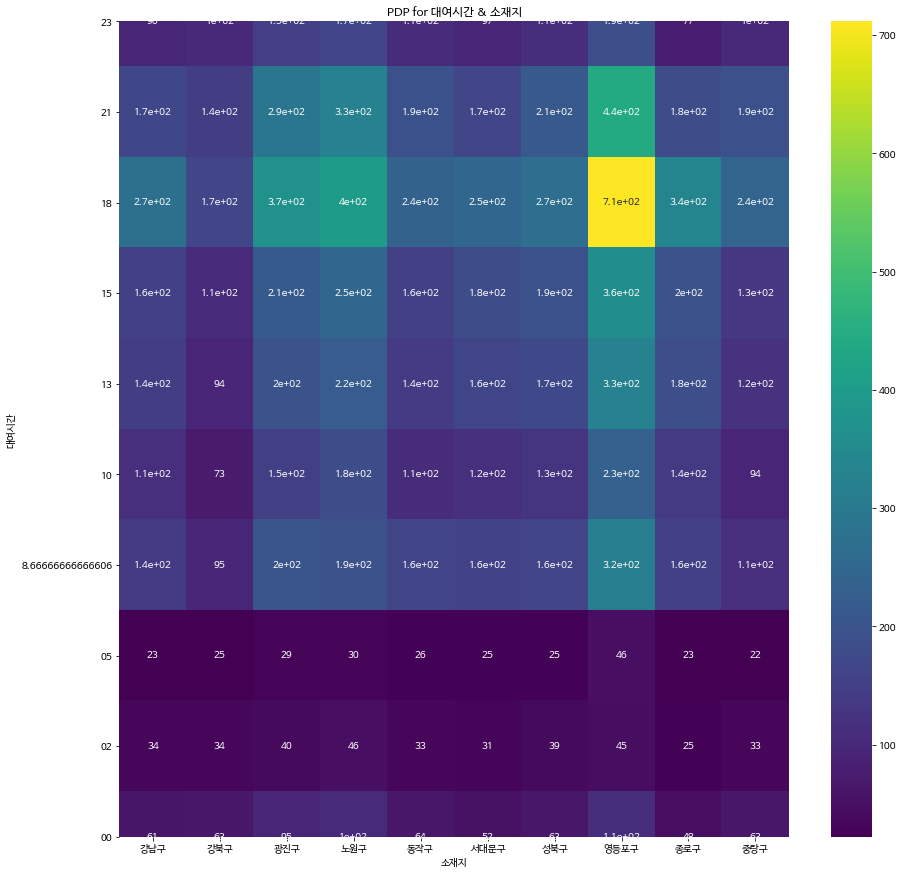

In [54]:
# 2D PDP를 데이터프레임 형식으로 변환
pdp = interaction.pdp.pivot_table(
    values="preds",
    columns=features[1],
    index=features[0]
)[::-1]


# seaborn으로 heatmap 그래프 생성
pdp = pdp.rename(columns=dict(zip(category_codes1, category_names1)),
                 index=dict(zip(category_codes0, category_names0)))
plt.figure(figsize=(15,15))
sns.heatmap(pdp, annot=True, cmap="viridis")
plt.title("PDP for 대여시간 & 소재지")

In [55]:
# shap의 force plot을 생성
import shap

# 임의의 데이터 추출
row = X_test.iloc[[1000]]

explainer = shap.TreeExplainer(model2)
shap_values = explainer.shap_values(row)

shap.initjs()
shap.force_plot(
    base_value = explainer.expected_value,
    shap_values = shap_values,
    features = row
)

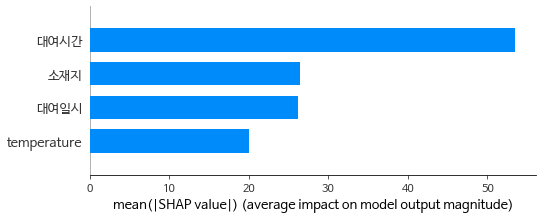

In [56]:
# shap의 summury plot을 생성
shap_values = explainer.shap_values(X_test.iloc[:500])
shap.summary_plot(shap_values, X_test.iloc[:500], plot_type='bar')

# 각 특성의 importance를 말함